In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset_features = pd.read_csv('Falcon9_Dataset_Part3.csv')

In [3]:
dataset_target = pd.read_csv('Falcon9_Dataset_Part2.csv')

In [4]:
Y = np.array(dataset_target['Class'])

In [5]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [6]:
X = dataset_features

In [7]:
#standardize the data
sc = StandardScaler()
X= sc.fit_transform(X)

In [8]:
#split dataset to train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [9]:
X_train.shape

(72, 80)

In [10]:
X_test.shape

(18, 80)

In [11]:
Y_train.shape

(72,)

In [12]:
Y_test.shape

(18,)

In [13]:
#standardize the data
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [14]:
#train all models with lazypredict to see which model is best the we can improve that
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions = clf.fit(X_train,X_test,Y_train,Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 40.41it/s]


In [15]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.94               0.92     0.92      0.94   
RidgeClassifier                    0.94               0.92     0.92      0.94   
NuSVC                              0.89               0.88     0.87      0.89   
XGBClassifier                      0.89               0.83     0.83      0.88   
GaussianNB                         0.78               0.79     0.79      0.78   
NearestCentroid                    0.78               0.79     0.79      0.78   
LinearDiscriminantAnalysis         0.83               0.79     0.79      0.83   
BernoulliNB                        0.83               0.75     0.75      0.81   
SGDClassifier                      0.83               0.75     0.75      0.81   
RidgeClassifierCV                  0.83               0.75     0.75      0.81   
ExtraTreesClassifier        

### Conclusion: we can see these three models LGBMClassifier,RidgeClassifier and BernoulliNB has the best accuracy but in this project we want to train logistic regression,SVM,decision tree and KNN model and compare these models

# Logistic Regression Model

In [16]:
#create a logistic regression object
classifier_lr = LogisticRegression()
#define parameters for logistic regression grid search
params = {
    'C':[0.01,0.1,1],
    'penalty':['l2'],
    'solver':['lbfgs']
}
#create a logistic regression grid search object
logreg_cv = GridSearchCV(classifier_lr,
                  param_grid=params,cv=10,scoring='accuracy')
#train grid search object
logreg_cv.fit(X_train,Y_train)
#print best parameters and score for logistic regression
print('The best parameteres for Logistic regression are:{x} and best accuracy score is {y}'.format(x=logreg_cv.best_params_,y=logreg_cv.best_score_))

The best parameteres for Logistic regression are:{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} and best accuracy score is 0.8214285714285714


In [17]:
#create logistic regression classifier object without best parameters
classifier_lr_wo=LogisticRegression()
#train classifier
classifier_lr_wo.fit(X_train,Y_train)
#predict values for test set
Y_predict_wo = classifier_lr_wo.predict(X_test)
# find and print accuracy in test set
logisticregression_accuracy_wo = accuracy_score(Y_test,Y_predict_wo)
print(logisticregression_accuracy_wo)
#find and print confusion matrix
logisticregression_matrix_wo=confusion_matrix(Y_test,Y_predict_wo)
print(logisticregression_matrix_wo)

0.8333333333333334
[[ 3  3]
 [ 0 12]]


In [18]:
#create logistic regression classifier object with best parameters
classifier_lr_w=LogisticRegression(C=0.1,penalty='l2',solver='lbfgs')
#train classifier
classifier_lr_w.fit(X_train,Y_train)
#predict values for test set
Y_predict_w = classifier_lr_w.predict(X_test)
# find and print accuracy in test set
logisticregression_accuracy_w = accuracy_score(Y_test,Y_predict_w)
print(logisticregression_accuracy_w)
#find and print confusion matrix
logisticregression_matrix_w=confusion_matrix(Y_test,Y_predict_w)
print(logisticregression_matrix_w)

0.8333333333333334
[[ 3  3]
 [ 0 12]]


# Support Vector Machine(SVM)

In [19]:
# create a svm object
svm_classifier = SVC()
#create a parameters for SVM grid search
params = {
    'kernel':('linear','rbf','poly','sigmoid'),
    'C':np.logspace(-3,3,5),
    'gamma':np.logspace(-3,3,5)
}
# create a svm grid search object
svm_cv = GridSearchCV(svm_classifier,
                     param_grid=params,
                     cv=10,
                     )
#train grid search object
svm_cv.fit(X_train,Y_train)
#find the best parameters and score
print('The best parameteres for SVM are:{x} and best accuracy score is {y}'.format(x=svm_cv.best_params_,y=svm_cv.best_score_))

The best parameteres for SVM are:{'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'} and best accuracy score is 0.8482142857142858


In [20]:
#create svm object without best parameters
svm_classifier_wo = SVC()
#train classifier
svm_classifier_wo.fit(X_train,Y_train)
#predict values of test set
Y_predict_wo=svm_classifier_wo.predict(X_test)
#print accuracy
svm_accuracy_wo = accuracy_score(Y_test,Y_predict_wo)
print(svm_accuracy_wo)
#print confusion matrix
svm_matrix_wo = confusion_matrix(Y_test,Y_predict_wo)
print(svm_matrix_wo)

0.8888888888888888
[[ 5  1]
 [ 1 11]]


In [42]:
#create svm object with best parameters
svm_classifier_w = SVC(C=1.0,gamma=0.032,kernel='sigmoid')
#train classifier
svm_classifier_w.fit(X_train,Y_train)
#predict values of test set
Y_predict_w=svm_classifier_w.predict(X_test)
#print accuracy
svm_accuracy_w = accuracy_score(Y_test,Y_predict_w)
print(svm_accuracy_w)
#print confusion matrix
svm_matrix_w = confusion_matrix(Y_test,Y_predict_w)
print(svm_matrix_w)

0.8333333333333334
[[ 3  3]
 [ 0 12]]


In [44]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [43]:
Y_predict_w

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot: >

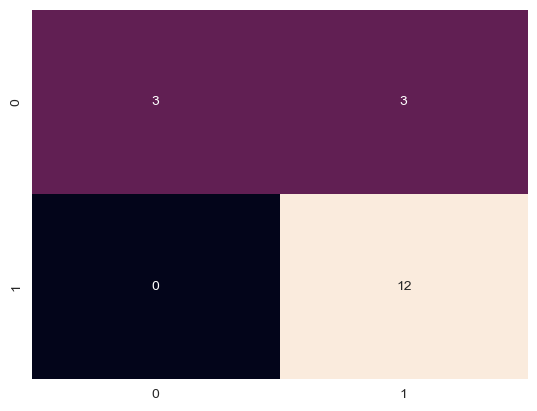

In [45]:
sns.heatmap(svm_matrix_w,annot=True,cbar=False)

In [46]:
#based on this heatmap for confusion matrix,we have 18 data in our test set. 12 out of 18 are positive and our model can predict all positive data correctly.
#but 6 out of 18 are negative values and our model can predict only 3 of them correctly.

# Decision Tree

In [22]:
#create a object for decision tree 
decisiontree_classifier= DecisionTreeClassifier()
#define parameters for decision tree grid search
params={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2*n for n in range(1,10)],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10]
}
#create a decision tree grid search object
tree_cv = GridSearchCV(decisiontree_classifier,
                      param_grid=params,
                      cv=10,
                      scoring='accuracy')
#train grid search object with training set
tree_cv.fit(X_train,Y_train)
#print the best parameters and score
print('The best parameteres for Decision Tree are:{x} and best accuracy score is {y}'.format(x=tree_cv.best_params_,y=tree_cv.best_score_))

The best parameteres for Decision Tree are:{'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'} and best accuracy score is 0.875


In [23]:
#create a decision tree classifier without best parameters
decisiontree_classifier_wo=DecisionTreeClassifier()
#train decision tree classifer
decisiontree_classifier_wo.fit(X_train,Y_train)
#predict values for test set
Y_predict_wo = decisiontree_classifier_wo.predict(X_test)
#find and print accuracy 
decisiontree_accuracy_wo = accuracy_score(Y_test,Y_predict_wo)
print(decisiontree_accuracy_wo)
#find and print confusion matrix
decisiontree_matrix_wo =confusion_matrix(Y_test,Y_predict_wo)
print(decisiontree_matrix_wo)

0.6666666666666666
[[3 3]
 [3 9]]


In [24]:
#create a decision tree classifier with best parameters
decisiontree_classifier_w=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=5,splitter='best')
#train decision tree classifer
decisiontree_classifier_w.fit(X_train,Y_train)
#predict values for test set
Y_predict_w = decisiontree_classifier_w.predict(X_test)
#find and print accuracy 
decisiontree_accuracy_w = accuracy_score(Y_test,Y_predict_w)
print(decisiontree_accuracy_w)
#find and print confusion matrix
decisiontree_matrix_w =confusion_matrix(Y_test,Y_predict_w)
print(decisiontree_matrix_w)

0.8333333333333334
[[ 3  3]
 [ 0 12]]


# KNN

In [25]:
#create a KNN classifier object
knn_classifier = KNeighborsClassifier()
#define parameters for grid search
params={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2]
}
#create a knn grid search object
knn_cv=GridSearchCV(knn_classifier,
                   param_grid=params,
                   cv=10)
#train grid search object
knn_cv.fit(X_train,Y_train)
#print best parameters and best score
print('The best parameteres for KNN are:{x} and best accuracy score is {y}'.format(x=knn_cv.best_params_,y=knn_cv.best_score_))

The best parameteres for KNN are:{'algorithm': 'auto', 'n_neighbors': 8, 'p': 1} and best accuracy score is 0.8321428571428571


In [26]:
#create a knn classifier object without best parameters
knn_classifier_wo = KNeighborsClassifier()
#train classifier
knn_classifier_wo.fit(X_train,Y_train)
#predict values for test set
Y_predict_wo=knn_classifier_wo.predict(X_test)
#find and print accuracy
knn_accuracy_wo = accuracy_score(Y_test,Y_predict_wo)
print(knn_accuracy_wo)
#find and print matrix
knn_matrix_wo = confusion_matrix(Y_test,Y_predict_wo)
print(knn_matrix_wo)

0.6666666666666666
[[ 0  6]
 [ 0 12]]


In [27]:
#create a knn classifier object with best parameters
knn_classifier_w = KNeighborsClassifier(algorithm='auto',n_neighbors=8,p=1)
#train classifier
knn_classifier_w.fit(X_train,Y_train)
#predict values for test set
Y_predict_w=knn_classifier_w.predict(X_test)
#find and print accuracy
knn_accuracy_w = accuracy_score(Y_test,Y_predict_w)
print(knn_accuracy_w)
#find and print matrix
knn_matrix_w = confusion_matrix(Y_test,Y_predict_w)
print(knn_matrix_w)

0.8333333333333334
[[ 3  3]
 [ 0 12]]


# LGBMClassifier

In [28]:
import lightgbm as lgb

In [29]:
lightgbm_classifier = lgb.LGBMClassifier(boosting_type='dart')
lightgbm_classifier.fit(X_train,Y_train)
Y_predict = lightgbm_classifier.predict(X_test)
accur = accuracy_score(Y_test,Y_predict)
print(accur)
matr = confusion_matrix(Y_test,Y_predict)
print(matr)

0.9444444444444444
[[ 5  1]
 [ 0 12]]


# Bar chart For Accuracy

In [31]:
accuracy_data_without_best_parameters = [[logisticregression_accuracy_wo],
                 [svm_accuracy_wo],
                 [decisiontree_accuracy_wo],
                 [knn_accuracy_wo]]

In [32]:
accuracy_data_with_best_parameters = [[logisticregression_accuracy_w],
                 [svm_accuracy_w],
                 [decisiontree_accuracy_w],
                 [knn_accuracy_w]]

In [33]:
accuracy_data_without_best_parameters = pd.DataFrame(accuracy_data_without_best_parameters,index=['logisticRegression','SVM','DecisionTree','KNN'],columns=['Accuracy'])

In [34]:
accuracy_data_with_best_parameters = pd.DataFrame(accuracy_data_with_best_parameters,index=['logisticRegression','SVM','DecisionTree','KNN'],columns=['Accuracy'])

# Accuracy Rate without applying best parameters

<AxesSubplot: ylabel='Accuracy'>

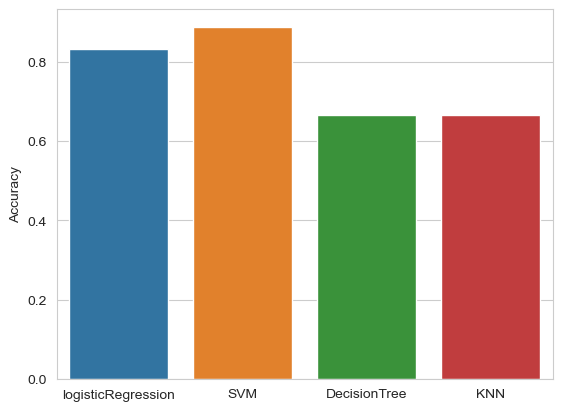

In [36]:
sns.barplot(x=accuracy_data_without_best_parameters.index,y=accuracy_data_without_best_parameters['Accuracy'])

# Accuracy Rate with applying best parameters

<AxesSubplot: ylabel='Accuracy'>

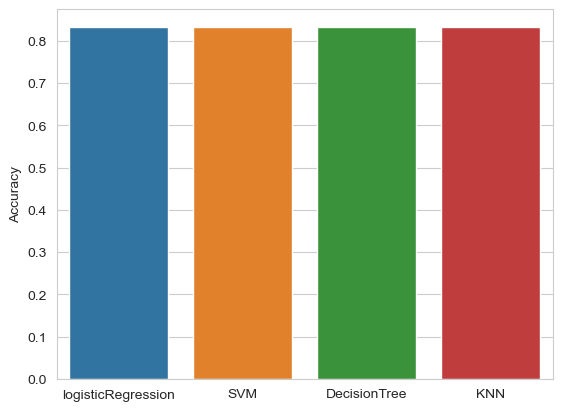

In [37]:
sns.barplot(x=accuracy_data_with_best_parameters.index,y=accuracy_data_with_best_parameters['Accuracy'])